# Data Preparation Phase

In this notebook, we will:
1. Load and examine the data
2. Remove exact duplicates
3. Apply feature scaling
4. Perform PCA analysis
5. Save the processed dataset

Note: We will preserve outliers and near-duplicates



In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import shutil

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting style - using a simpler style to avoid seaborn issues
plt.style.use('default')

# Ensure directories exist
os.makedirs('../data/interim', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

# Copy raw data to interim folder if it doesn't exist there
if not os.path.exists('../data/interim/concrete_data.csv'):
    shutil.copy('../data/raw/Concrete_Data_Yeh.csv', '../data/interim/concrete_data.csv')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('../data/interim/concrete_data.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())


Loading dataset...
Dataset loaded successfully!
Shape: (1030, 9)

Columns in the dataset:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

First few rows:
   cement    slag  flyash   water  superplasticizer  coarseaggregate  \
0 540.000   0.000   0.000 162.000             2.500         1040.000   
1 540.000   0.000   0.000 162.000             2.500         1055.000   
2 332.500 142.500   0.000 228.000             0.000          932.000   
3 332.500 142.500   0.000 228.000             0.000          932.000   
4 198.600 132.400   0.000 192.000             0.000          978.400   

   fineaggregate  age  csMPa  
0        676.000   28 79.990  
1        676.000   28 61.890  
2        594.000  270 40.270  
3        594.000  365 41.050  
4        825.500  360 44.300  


In [35]:
# Display detailed information about the columns
print("Column names in the dataset:")
for col in df.columns:
    print(f"'{col}'")
    
print("\nDataset Info:")
df.info()


Column names in the dataset:
'cement'
'slag'
'flyash'
'water'
'superplasticizer'
'coarseaggregate'
'fineaggregate'
'age'
'csMPa'

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## 2. Handle Exact Duplicates

Let's check for and remove exact duplicates in the dataset.


In [36]:
# Check for duplicates
initial_rows = len(df)
duplicates = df.duplicated()
n_duplicates = duplicates.sum()

print(f"Number of exact duplicates found: {n_duplicates}")

if n_duplicates > 0:
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"\nRows after removing duplicates: {len(df)}")
    print(f"Removed {initial_rows - len(df)} duplicate rows")

# Save intermediate result
df.to_csv('../data/interim/concrete_data_no_duplicates.csv', index=False)
print("\nIntermediate dataset saved to '../data/interim/concrete_data_no_duplicates.csv'")


Number of exact duplicates found: 25

Rows after removing duplicates: 1005
Removed 25 duplicate rows

Intermediate dataset saved to '../data/interim/concrete_data_no_duplicates.csv'


In [37]:
# Find the target column (looking for 'MPa' or 'strength' in column name)
target_col = None
for col in df.columns:
    if 'MPa' in col or 'strength' in col.lower():
        target_col = col
        break

if target_col is None:
    # If target column not found, print all columns and raise error
    print("Available columns:", df.columns.tolist())
    raise ValueError("Could not find the target column (strength/MPa). Please check column names.")

print(f"Target column identified: '{target_col}'")

# Get feature columns (all columns except target)
features = [col for col in df.columns if col != target_col]
print("\nFeature columns:", features)

# Initialize scaler
scaler = StandardScaler()

# Create copy for scaling
df_scaled = df.copy()

# Scale features
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Print scaling report
print("\nFeature Scaling Report:")
print("-" * 50)
for column in features:
    print(f"\nFeature: {column}")
    print("Before scaling:")
    print(f"  Mean: {df[column].mean():.3f}")
    print(f"  Std: {df[column].std():.3f}")
    print("After scaling:")
    print(f"  Mean: {df_scaled[column].mean():.3f}")
    print(f"  Std: {df_scaled[column].std():.3f}")

# Save both intermediate and processed versions
df_scaled.to_csv('../data/interim/concrete_data_scaled.csv', index=False)
df_scaled.to_csv('../data/processed/concrete_data_scaled_no_pca.csv', index=False)
print("\nScaled datasets saved to:")
print("- '../data/interim/concrete_data_scaled.csv' (intermediate version)")
print("- '../data/processed/concrete_data_scaled_no_pca.csv' (final version without PCA)")


Target column identified: 'csMPa'

Feature columns: ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

Feature Scaling Report:
--------------------------------------------------

Feature: cement
Before scaling:
  Mean: 278.631
  Std: 104.344
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: slag
Before scaling:
  Mean: 72.043
  Std: 86.171
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: flyash
Before scaling:
  Mean: 55.536
  Std: 64.208
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: water
Before scaling:
  Mean: 182.075
  Std: 21.339
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: superplasticizer
Before scaling:
  Mean: 6.033
  Std: 5.920
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: coarseaggregate
Before scaling:
  Mean: 974.377
  Std: 77.580
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: fineaggregate
Before scaling:
  Mean: 772.688
  Std: 80.340
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: age


## 3. Feature Scaling

We'll use StandardScaler for feature scaling as it's appropriate for PCA. We'll scale all features except the target variable.


In [38]:
# Find the target column (looking for 'MPa' or 'strength' in column name)
target_col = None
for col in df.columns:
    if 'MPa' in col or 'strength' in col.lower():
        target_col = col
        break

if target_col is None:
    # If target column not found, print all columns and raise error
    print("Available columns:", df.columns.tolist())
    raise ValueError("Could not find the target column (strength/MPa). Please check column names.")

print(f"Target column identified: '{target_col}'")

# Get feature columns (all columns except target)
features = [col for col in df.columns if col != target_col]
print("\nFeature columns:", features)

# Initialize scaler
scaler = StandardScaler()

# Create copy for scaling
df_scaled = df.copy()

# Scale features
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Print scaling report
print("\nFeature Scaling Report:")
print("-" * 50)
for column in features:
    print(f"\nFeature: {column}")
    print("Before scaling:")
    print(f"  Mean: {df[column].mean():.3f}")
    print(f"  Std: {df[column].std():.3f}")
    print("After scaling:")
    print(f"  Mean: {df_scaled[column].mean():.3f}")
    print(f"  Std: {df_scaled[column].std():.3f}")

# Save intermediate result
df_scaled.to_csv('../data/interim/concrete_data_scaled.csv', index=False)
print("\nScaled dataset saved to '../data/interim/concrete_data_scaled.csv'")


Target column identified: 'csMPa'

Feature columns: ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

Feature Scaling Report:
--------------------------------------------------

Feature: cement
Before scaling:
  Mean: 278.631
  Std: 104.344
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: slag
Before scaling:
  Mean: 72.043
  Std: 86.171
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: flyash
Before scaling:
  Mean: 55.536
  Std: 64.208
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: water
Before scaling:
  Mean: 182.075
  Std: 21.339
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: superplasticizer
Before scaling:
  Mean: 6.033
  Std: 5.920
After scaling:
  Mean: -0.000
  Std: 1.000

Feature: coarseaggregate
Before scaling:
  Mean: 974.377
  Std: 77.580
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: fineaggregate
Before scaling:
  Mean: 772.688
  Std: 80.340
After scaling:
  Mean: 0.000
  Std: 1.000

Feature: age


## 5. Summary and Conclusions

1. Data Cleaning:
   - Removed exact duplicates only
   - Preserved outliers and near-duplicates as requested

2. Feature Scaling:
   - Applied StandardScaler to all features except target
   - All features now have mean=0 and std=1

3. PCA Analysis:
   - Analyzed variance explained by each component
   - Examined component loadings
   - Created PCA-transformed dataset

The processed datasets are saved in:
1. Scaled data (no PCA): '../data/processed/concrete_data_scaled_no_pca.csv'
2. PCA transformed data: '../data/processed/concrete_data_pca.csv'

Both versions are available for modeling:
- Use scaled_no_pca version when you want to work with original features
- Use PCA version when you want to work with transformed features


## 4. PCA Analysis

Let's perform PCA on the scaled features and analyze:
1. Explained variance ratio
2. Cumulative explained variance
3. Component loadings
4. Transformed data with principal components


Explained Variance Ratio by Principal Components:
--------------------------------------------------
PC1: 0.2890 (0.2890 cumulative)
PC2: 0.1786 (0.4676 cumulative)
PC3: 0.1590 (0.6267 cumulative)
PC4: 0.1273 (0.7539 cumulative)
PC5: 0.1205 (0.8744 cumulative)
PC6: 0.0988 (0.9733 cumulative)
PC7: 0.0229 (0.9962 cumulative)
PC8: 0.0038 (1.0000 cumulative)


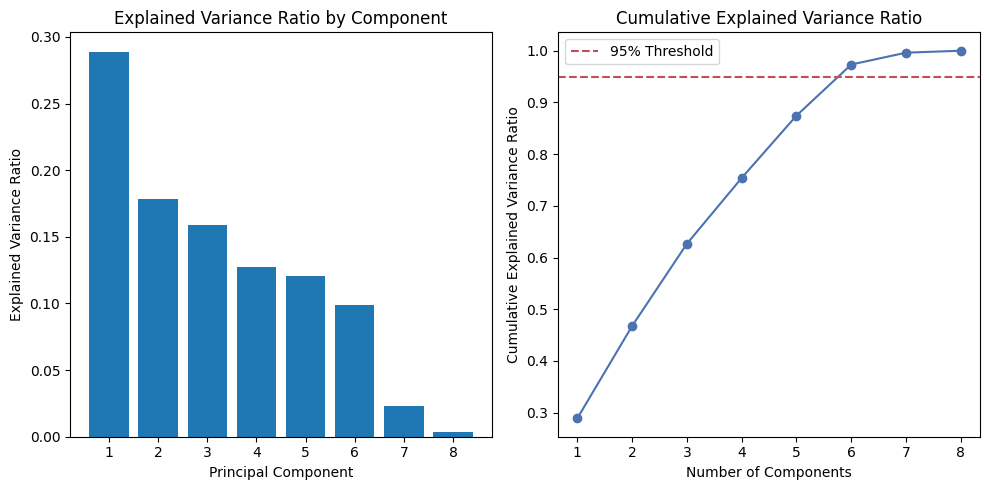


Component Loadings:
--------------------------------------------------
                    PC1    PC2    PC3    PC4    PC5    PC6    PC7   PC8
cement            0.123 -0.456  0.696  0.068 -0.096 -0.172 -0.221 0.448
slag              0.192  0.678  0.098  0.386  0.035  0.312 -0.229 0.440
flyash           -0.417  0.062 -0.352 -0.234 -0.573 -0.211 -0.355 0.381
water             0.540  0.144 -0.157 -0.300 -0.093 -0.370  0.528 0.386
superplasticizer -0.496  0.161  0.370  0.060 -0.324  0.211  0.660 0.053
coarseaggregate   0.011 -0.509 -0.468  0.521 -0.003  0.281  0.228 0.347
fineaggregate    -0.392 -0.008 -0.042 -0.396  0.698  0.101  0.042 0.435
age               0.287 -0.152  0.019 -0.519 -0.247  0.747 -0.072 0.014

PCA transformed dataset saved to '../data/processed/concrete_data_pca.csv'

Correlations with Target Variable:
--------------------------------------------------
csMPa    1.000
PC3      0.260
PC8      0.104
PC6      0.064
PC4     -0.001
PC2     -0.025
PC7     -0.049
PC1     -0.1

In [39]:
# Initialize PCA
pca = PCA()

# Fit PCA on scaled features
X_pca = pca.fit_transform(df_scaled[features])

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print variance explained by each component
print("Explained Variance Ratio by Principal Components:")
print("-" * 50)
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ratio:.4f} ({cumulative_variance_ratio[i-1]:.4f} cumulative)")

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Create component loadings dataframe
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, len(features) + 1)],
    index=features
)

print("\nComponent Loadings:")
print("-" * 50)
print(loadings)

# Create dataframe with PCA transformed data
pca_cols = [f'PC{i}' for i in range(1, len(features) + 1)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca[target_col] = df_scaled[target_col]  # Add target variable

# Save PCA results
df_pca.to_csv('../data/processed/concrete_data_pca.csv', index=False)
print("\nPCA transformed dataset saved to '../data/processed/concrete_data_pca.csv'")

# Calculate correlations with target
correlations = df_pca.corr()[target_col].sort_values(ascending=False)

print("\nCorrelations with Target Variable:")
print("-" * 50)
print(correlations)


## 5. Summary and Conclusions

1. Data Cleaning:
   - Removed exact duplicates only
   - Preserved outliers and near-duplicates

2. Feature Scaling:
   - Applied StandardScaler to all features except target
   - All features now have mean=0 and std=1

3. PCA Analysis:
   - Analyzed variance explained by each component
   - Examined component loadings
   - Created PCA-transformed dataset

The processed datasets are saved in:
1. Scaled data: '../data/interim/concrete_data_scaled.csv'
2. PCA transformed data: '../data/processed/concrete_data_pca.csv'
